In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, max_error

In [2]:
df = pd.read_csv('../datasets/pre_train.csv')
df.head()

,temperature_2m_max (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),shortwave_radiation_sum (MJ/m²),et0
0,31.3,25.9,34.8,0.0,0.0,0.0,17.41,3.90
1,32.5,28.2,36.0,0.2,0.2,1.0,15.43,3.69
2,32.4,27.0,35.3,0.0,0.0,0.0,18.64,4.34
3,32.3,28.1,36.4,0.1,0.1,1.0,15.47,3.52
4,31.4,26.3,35.4,0.0,0.0,0.0,17.40,3.99


In [3]:
# # X = df.drop(columns=['et0', 'shortwave'])
# X = df.drop(columns=['et0'])

# y = df['et0']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_data = lgb.Dataset(X_train, label=y_train)
# test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [4]:
# X = df.drop(columns=['et0', 'shortwave'])
# df = df.drop(columns=['shortwave_radiation_sum (MJ/m²)'])

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

X_train = train_data.drop(columns=['et0'])
y_train = train_data['et0']

X_test = test_data.drop(columns=['et0'])
y_test = test_data['et0']

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [5]:
params = {
    'objective': 'regression',  # Regression task
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
}

num_round = 1000  # Number of boosting rounds (iterations)
model = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1433
[LightGBM] [Info] Number of data points in the train set: 116667, number of used features: 7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.295577
[1]	valid_0's rmse: 1.18194
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.12901
[3]	valid_0's rmse: 1.07897
[4]	valid_0's rmse: 1.03136
[5]	valid_0's rmse: 0.986776
[6]	valid_0's rmse: 0.944348
[7]	valid_0's rmse: 0.904471
[8]	valid_0's rmse: 0.866471
[9]	valid_0's rmse: 0.830642
[10]	valid_0's rmse: 0.797046
[11]	valid_0's rmse: 0.765069
[12]	valid_0's rmse: 0.734638
[13]	valid_0's rmse: 0.70594
[14]	valid_0's rmse: 0.679388
[15]	valid_0's rmse: 0.65407

In [117]:
params = {
    'objective': 'regression',  # Regression task
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'num_leaves': 100,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
}

num_round = 1000  # Number of boosting rounds (iterations)
model = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 116667, number of used features: 6
[LightGBM] [Info] Start training from score 4.295577
[1]	valid_0's rmse: 1.18835
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.14151
[3]	valid_0's rmse: 1.09761
[4]	valid_0's rmse: 1.05624
[5]	valid_0's rmse: 1.01724
[6]	valid_0's rmse: 0.980737
[7]	valid_0's rmse: 0.946293
[8]	valid_0's rmse: 0.914136
[9]	valid_0's rmse: 0.883963
[10]	valid_0's rmse: 0.855704
[11]	valid_0's rmse: 0.829192
[12]	valid_0's rmse: 0.804512
[13]	valid_0's rmse: 0.781381
[14]	valid_0's rmse: 0.759678
[15]	valid_0's rmse: 0.739507
[16]	valid_0's rmse: 0.720602
[17]	valid_0's rmse: 0.703008
[18]	valid_0's rms

In [108]:
# # Create a LightGBM regressor
# model = lgb.LGBMRegressor()

# # Define a parameter grid to search
# param_grid = {
#     'num_leaves': [200, 300, 400],
#     'learning_rate': [0.1],
#     'n_estimators': [400, 500, 700],
#     'max_depth': [20, 30, 40]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Get the best estimator
# model = grid_search.best_estimator_
# y_pred = model.predict(X_test)

In [109]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

absolute_percentage_errors = np.abs((y_test -  y_pred) / y_test)
mape = np.mean(absolute_percentage_errors) * 100  #
max_err = max_error(y_test, y_pred)

print(f"R-squared (R2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("Max Error:", max_err)

R-squared (R2) Score: 0.9765565109391446
Root Mean Squared Error (RMSE): 0.1895012933430271
Mean Absolute Percentage Error (MAPE): 3.23%
Max Error: 1.3128046212780893


In [118]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

absolute_percentage_errors = np.abs((y_test -  y_pred) / y_test)
mape = np.mean(absolute_percentage_errors) * 100  #
max_err = max_error(y_test, y_pred)

print(f"R-squared (R2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("Max Error:", max_err)

R-squared (R2) Score: 0.8494680265483465
Root Mean Squared Error (RMSE): 0.4801925658269453
Mean Absolute Percentage Error (MAPE): 9.58%
Max Error: 2.8958070400931417


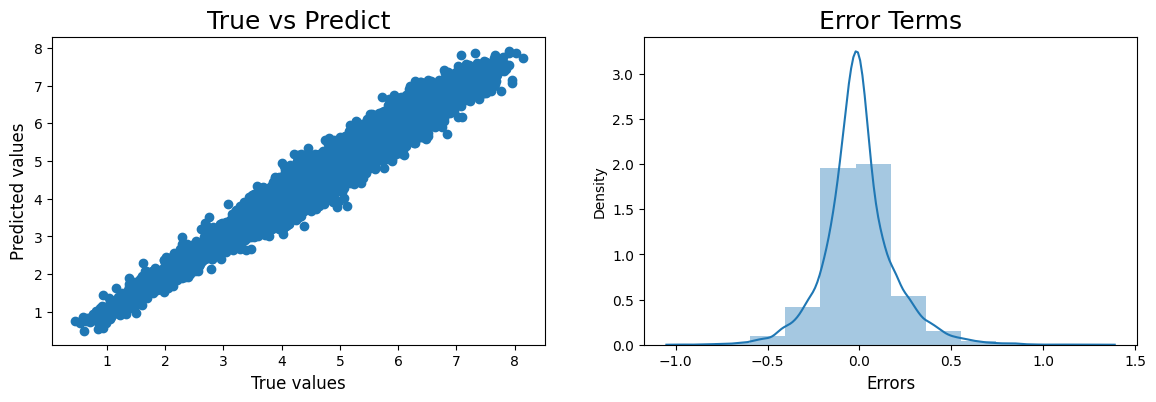

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.title('True vs Predict', fontsize=18) 
plt.xlabel('True values', fontsize=12)            
plt.ylabel('Predicted values', fontsize=12) 
    
plt.subplot(1, 2, 2)
plt.title('Error Terms', fontsize = 18)
sns.distplot((y_test - y_pred), bins = 12)
plt.xlabel('Errors', fontsize = 12)  
plt.show()

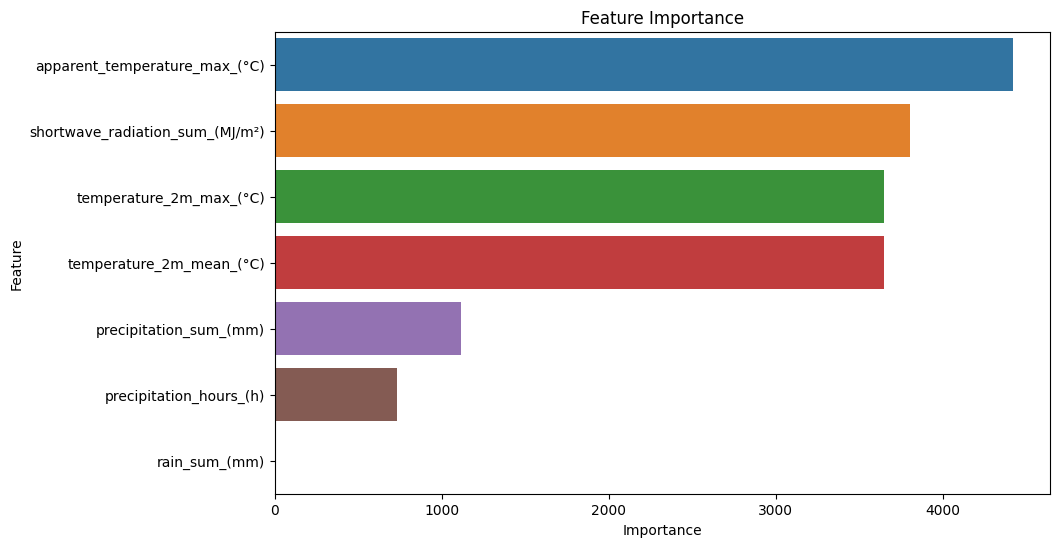

In [9]:
# Get feature importances
feature_importance = model.feature_importance(importance_type='split')  # 'split' or 'gain'

# Get feature names
feature_names = model.feature_name()

# Create a feature importance dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the dataframe by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

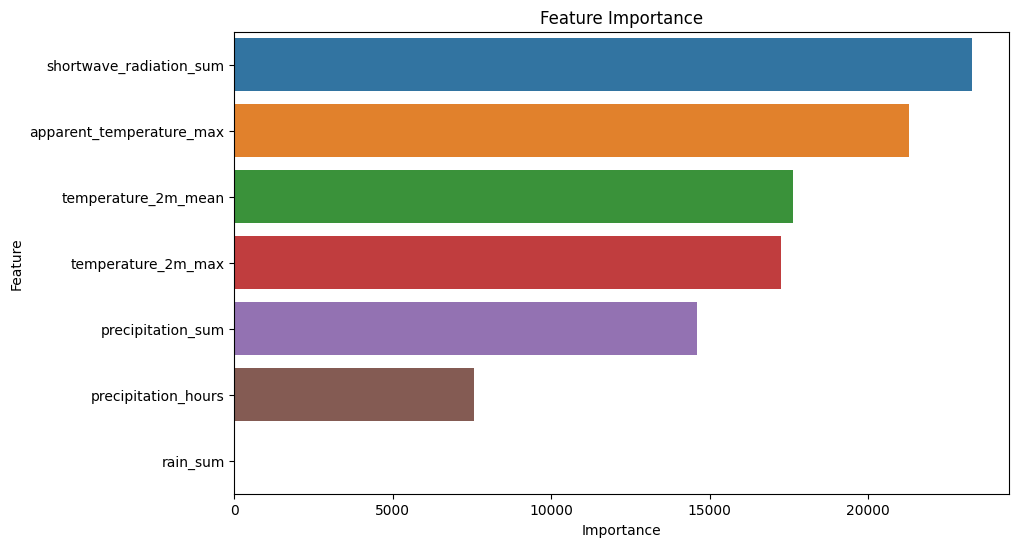

In [44]:
# Get feature importances
feature_importance = model.feature_importance(importance_type='split')  # 'split' or 'gain'

# Get feature names
feature_names = model.feature_name()

# Create a feature importance dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the dataframe by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [113]:
import joblib

joblib.dump(model, '../datasets/lgbm_model.pkl')

['../datasets/lgbm_model.pkl']